In [1]:
import kbench
from xaosim.shmlib import shm
import numpy as np
import matplotlib.pyplot as plt
from time import sleep

chip = kbench.Chip(6)

✅ BMC lib found. Running in control mode.


/tmp/ipykernel_83242/3895357141.py:7: DeprecationWarning: Chip is deprecated, use Arch instead
  chip = kbench.Chip(6)


In [2]:
channel = 17
current = 300 # mA
tension = 10 # V

CUR = current * 65535 / 300
VOLT = tension * 65535 / 40

In [3]:
chip.send_command(f"CH:{channel}-{channel}:CUR:{int(CUR)}")

AttributeError: 'Chip' object has no attribute 'send_command'

In [ ]:
chip.send_command(f"CH:{channel}-{channel}:VOLT:{int(VOLT)}")

'CH:17-17:VOLT:16383\t>> Channel 17-17 set to 16383'

In [ ]:
chip.send_command(f"CH:{channel}:VAL?")

'CH:17:VAL?\t>> Channel 17 = 9.986V, 13.605mA'

🔧 Calibrating channel 17 using 2-point measurement...
📤 XPOW TX: 'CH:17:CUR:65535'
📥 Output disabled
📤 XPOW TX: 'CH:17:VOLT:1638'
📥 Output disabled
📤 XPOW TX: 'CH:17:VAL?'
📥 XPOW RX: 'CH:17:VAL?	>> Channel 17 = 1.003V, 1.319mA'
📤 XPOW TX: 'CH:17:VAL?'
📥 XPOW RX: 'CH:17:VAL?	>> Channel 17 = 0.997V, 1.319mA'
📤 XPOW TX: 'CH:17:VOLT:49151'
📥 Output disabled
📤 XPOW TX: 'CH:17:VAL?'
📥 XPOW RX: 'CH:17:VAL?	>> Channel 17 = 29.970V, 40.432mA'
📤 XPOW TX: 'CH:17:VAL?'
📥 XPOW RX: 'CH:17:VAL?	>> Channel 17 = 29.968V, 40.460mA'
✅ Channel 17 calibrated: slope=0.001351
📤 XPOW TX: 'CH:17:CUR:0'
📥 Output disabled
📤 XPOW TX: 'CH:17:VOLT:0'
📥 Output disabled
✅ Channel 17 turned off.
[ 0.     6.788  9.592 11.737 13.551 15.117 16.574 17.839 19.075 20.202
 21.247 22.237 23.253 24.16  25.039 25.891 26.744 27.569 28.339 29.081
 29.878 30.592 31.307 32.021 32.709 33.368 34.055 34.687 35.32  35.952
 36.584] [ 0.     4.96   7.015  8.591  9.92  11.091 12.148 13.122 14.03  14.882
 15.685 16.451 17.183 17.886 18.561

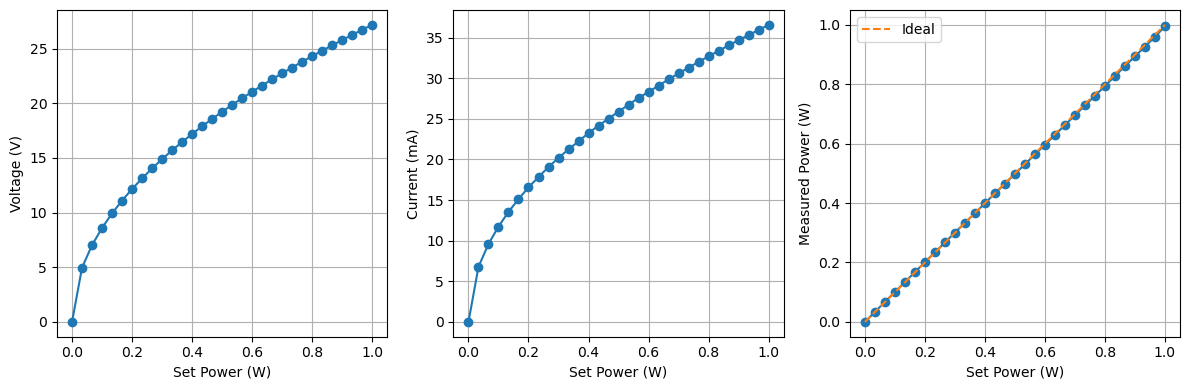

In [ ]:
# Test the new set_power() method with auto-calibration
channel = kbench.PhaseShifter(17)

power_range = np.linspace(0, 1, 31)

real_voltage = np.empty_like(power_range)
real_current = np.empty_like(power_range)
real_power = np.empty_like(power_range)

for i, p in enumerate(power_range):
    channel.set_power(p)
    real_voltage[i] = channel.get_voltage()
    real_current[i] = channel.get_current()
    real_power[i] = channel.get_power()

print(real_current, real_voltage, real_power)

fig, axs = plt.subplots(1, 3, figsize=(12, 4))
axs[0].plot(power_range, real_voltage, '-o')
axs[0].set_ylabel("Voltage (V)")
axs[0].set_xlabel("Set Power (W)")
axs[0].grid()

axs[1].plot(power_range, real_current, '-o')
axs[1].set_ylabel("Current (mA)")
axs[1].set_xlabel("Set Power (W)")
axs[1].grid()

axs[2].plot(power_range, real_power, '-o')
axs[2].plot(power_range, power_range, '--', label='Ideal')
axs[2].set_ylabel("Measured Power (W)")
axs[2].set_xlabel("Set Power (W)")
axs[2].legend()
axs[2].grid()
plt.tight_layout()
plt.show()


Cred3 camera initialized with dark subtraction


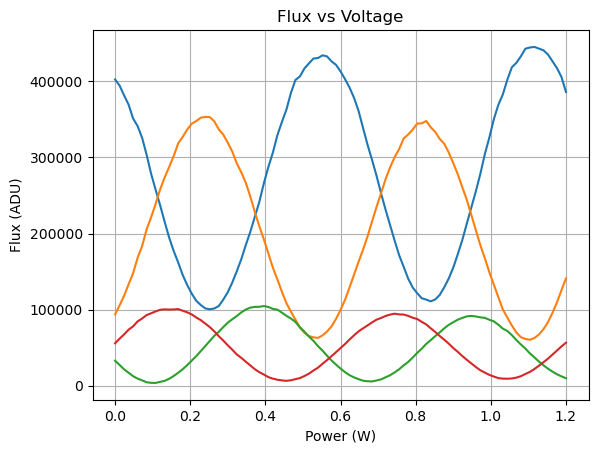

In [5]:
# px window around the output
crop_size = 10
# px coordinates of the output spots
crop_centers = np.array([(320, 310),
                        (353, 310),
                        (385, 310),
                        (417, 310)])

# Power ramp
ramp = np.linspace(0, 1.2, 101) # [W]

# Controlled equipments
shifter = kbench.PhaseShifter(17)
cam = kbench.Cred3()

# Data acquisition
flux = []
for power in ramp:
    shifter.set_power(power)
    flux.append(cam.get_outputs(crop_centers=crop_centers, crop_sizes=crop_size))


plt.figure()
plt.plot(ramp, flux)
plt.xlabel("Power (W)")
plt.ylabel("Flux (ADU)")
plt.title("Flux vs Voltage")
plt.grid()
plt.show()

sleep(3)
shifter.turn_off()